## Take-Home Exercise: Instructions

Please don’t spend more than 4-6 hours on this -- both out of consideration for your time, and also out of fairness to other candidates who can’t spend more time than that.

Download the Data Folder from https://archive.ics.uci.edu/ml/datasets/sEMG+for+Basic+Hand+movements. 


Analyze the data in "Database 1" with the following goals: 

Inspect the data to expose any features that will inform your modeling efforts.

From the EMG signals, can you distinguish the different grasps within a single user?

Can you distinguish the different grasps in a way that generalizes across users?

Optional, i.e. only if you have time. Can you identify the user from the EMG data? Do you need to know what gesture is being performed to do this?


Submitting your code:

Please submit your code, results, and interpretations in an IPython notebook (or similarly communicative medium if not using Python). Explain your reasoning for trying your approaches, and please include any results for approaches that didn't work out as well as expected.

We use a blind reviewing process, so don’t include your name or any identifying information in the write-up.

You can zip up and email your work to ben@ctrl-labs.com.

![title](sEMG_Basic_Hand_movements_upatras/grasps_en.png)

In [267]:
import scipy.io as sio
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import numpy as np
import math
from PyEMD import EMD

In [238]:
Data = sio.loadmat('sEMG_Basic_Hand_movements_upatras/Database 1/female_1.mat')

spher_ch1 = Data['spher_ch1']
spher_ch2 = Data['spher_ch2']

tip_ch1 = Data['tip_ch1']
tip_ch2 = Data['tip_ch2']

palm_ch1 = Data['palm_ch1']
palm_ch2 = Data['palm_ch2']

lat_ch1 = Data['lat_ch1']
lat_ch2 = Data['lat_ch2']

cyl_ch1 = Data['cyl_ch1']
cyl_ch2 = Data['cyl_ch2']

hook_ch1 = Data['hook_ch1']
hook_ch2 = Data['hook_ch2']

In [239]:
Fs = 500 # sampling frequency is 500 Hz
dt = 1/500 # sampling time resolution 2 ms
Len = spher_ch1.shape[1] # 6 sec long recording
Ntrials = 30 # each matrix has 30 trials 
print(Len)

3000


(0, 250)

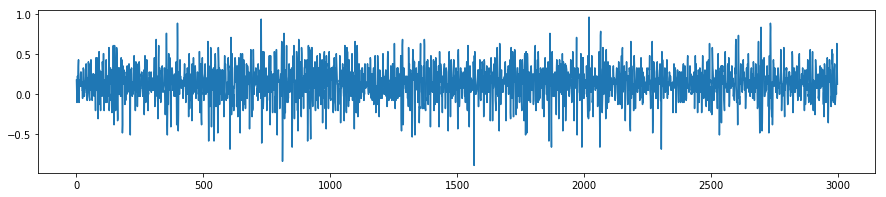

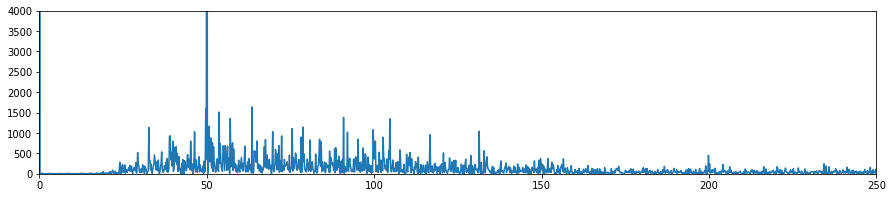

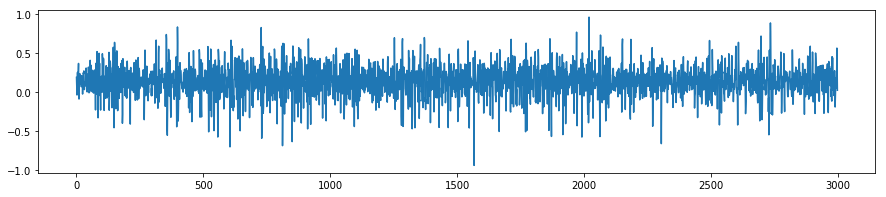

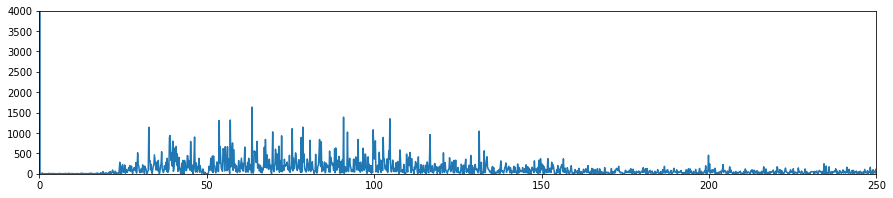

In [240]:

#---------------------------
# data = spher_ch1[4,:] 
data = palm_ch1[10,:] 
ps = np.abs(np.fft.fft(data))**2

time_step = dt
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.figure(figsize=(15,3))
fig = plt.plot(data)

plt.figure(figsize=(15,3))
plt.plot(freqs[idx], ps[idx])
plt.ylim(0, 4000)
plt.xlim(0, 250)

#---------------------------
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 30.0   # Quality factor
w0 = f0/(Fs/2)  # Normalized Frequency
iirnotch_b, iirnotch_a = signal.iirnotch(w0, Q)
dataf = signal.filtfilt(iirnotch_b,iirnotch_a,data)

data = dataf
ps = np.abs(np.fft.fft(data))**2
#---------------------------
time_step = 1 / 500
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.figure(figsize=(15,3))
fig = plt.plot(data)

plt.figure(figsize=(15,3))
plt.plot(freqs[idx], ps[idx])
plt.ylim(0, 4000)
plt.xlim(0, 250)


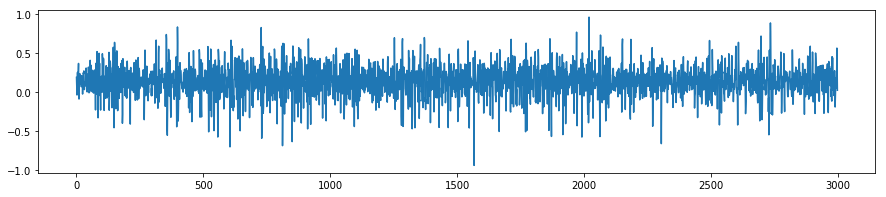

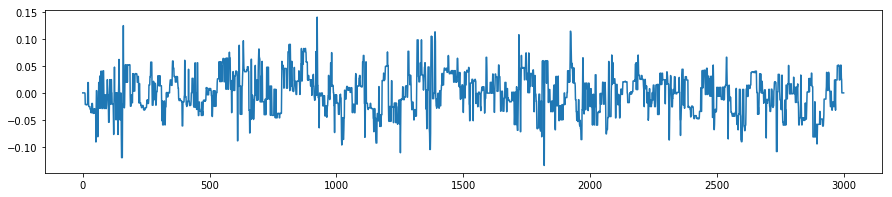

In [113]:
def average(arr, n):
    end =  n * int(len(arr)/n)
    return np.mean(arr[:end].reshape(-1, n), 1)

plt.figure(figsize=(15,3))
fig = plt.plot(data)

data_down = average(data, 20)

data_down1 = signal.medfilt(data - np.median(data) ,21)
# print( )

# start_point

plt.figure(figsize=(15,3))
# fig = plt.plot(data_down)
fig = plt.plot(data_down1)


(8, 350)


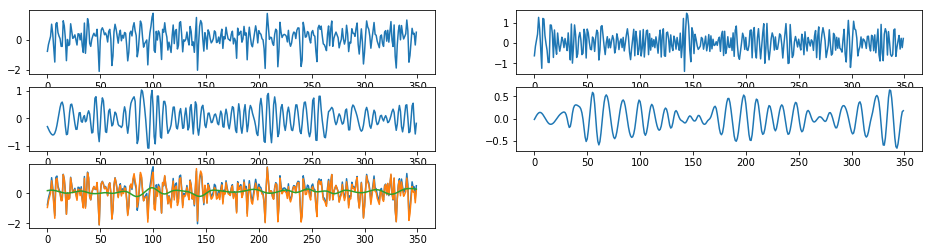

In [250]:
sliding_window_start= 1500
window_width = 350
sliding_window = np.arange(sliding_window_start,sliding_window_start+window_width)
IMFid = np.array([0,1,2])

# data = palm_ch1[10,1000:1150] 
data = cyl_ch1[10,sliding_window] 

data = signal.filtfilt(iirnotch_b,iirnotch_a,data)

emd = EMD() 
IMFs = emd(data) 
assembly = IMFs[IMFid].sum(axis=0)

print(IMFs.shape)

plt.figure(figsize=(16,4))
plt.subplot(321)
fig = plt.plot(data)
plt.subplot(322)
fig = plt.plot(IMFs[0,:])
plt.subplot(323)
fig = plt.plot(IMFs[1,:])
plt.subplot(324)
fig = plt.plot(IMFs[2,:])
plt.subplot(325)
fig = plt.plot(data)
fig = plt.plot(assembly)
fig = plt.plot(data-assembly)


# data = cyl_ch2[10,600:950] 

# data = signal.filtfilt(iirnotch_b,iirnotch_a,data)

# emd = EMD() 
# IMFs = emd(data) 
# print(IMFs.shape)

# plt.figure(figsize=(16,4))
# plt.subplot(221)
# fig = plt.plot(data)
# plt.subplot(222)
# fig = plt.plot(IMFs[0,:].T)
# plt.subplot(223)
# fig = plt.plot(IMFs[1,:].T)
# plt.subplot(224)
# fig = plt.plot(IMFs[2,:].T)




[0.74615326 0.58080719 0.42713768 0.34571679 0.25509448]
[136. 196. 112.  67.  27.]
[1.05331632 0.56537237 0.2955819  0.18742426 0.07517844]
[180. 195. 112.  68.  37.]
[297.18542814 266.98931509 127.64564251  67.0939364   23.84437894]
[[2.80232666e-01 4.89065514e-01 7.22682166e-02 ... 2.85012914e+00
  7.08425057e-01 7.37761298e-01]
 [2.72445054e-03 9.32671378e-02 1.15669888e-01 ... 2.94821886e+00
  4.06121695e-01 9.29773014e-02]
 [1.91062437e-01 1.93193535e-01 1.57156073e-01 ... 5.24001843e-02
  2.47949675e-01 5.02926607e-01]
 [9.37380317e-02 2.58932444e-01 2.77733690e-01 ... 5.55223873e-02
  4.40036720e-02 1.31146172e-01]
 [1.84335218e-03 5.63276025e-02 7.71759451e-02 ... 9.83285452e-03
  1.03500144e-02 1.07112167e-02]]
[-0.79948183  0.09992035 -0.05031502  0.05140118  0.03344353]


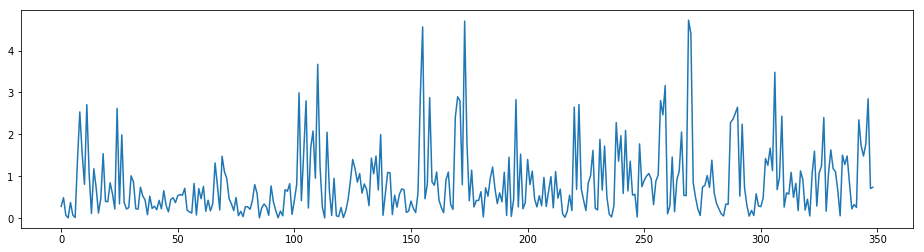

In [285]:
# sliding_window_start= np.arange(200, 3000-window_width, 100)
# print(sliding_window_start)

sliding_window_start= 1900
IMFid = np.array([0,1,2])
window_width = 350


# data = tip_ch1[10,sliding_window]
# data = cyl_ch1[10,sliding_window] 
# data = spher_ch1[10,sliding_window] 
# data = palm_ch1[10,sliding_window] 
# data = lat_ch1[10,sliding_window]
# Trial = hook_ch1[10,:]
    
win_s = sliding_window_start
sliding_window = np.arange(win_s,win_s+window_width)
data = hook_ch1[10,:]

## extracting features
data = signal.filtfilt(iirnotch_b,iirnotch_a,data)

data = data[sliding_window]

emd = EMD() 
IMFs = emd(data) 
assembly = IMFs[IMFid].sum(axis=0)
residual = data - assembly
X_stack = np.vstack((data, IMFs[IMFid], residual))

# plt.figure(figsize=(16,4))
# fig = plt.plot(X_stack[4,:])

IEMG = np.abs(X_stack).mean(axis=1)
ZC = (np.abs(np.diff(np.sign(X_stack)))/2).sum(axis=1)
VAR = np.var(X_stack, axis=1)
SSC = (np.abs(np.diff(np.sign( np.diff(X_stack) )))/2).sum(axis=1)
WL = np.abs(np.diff(X_stack)).sum(axis=1)
WAMP = np.abs(np.diff(X_stack)) 

Kurtosis = scipy.stats.kurtosis(X_stack, axis=1)
Skew = scipy.stats.skew(X_stack, axis=1)

X = np.hstack((IEMG,ZC,VAR,SSC,WL,Kurtosis,Skew))

plt.figure(figsize=(16,4))
fig = plt.plot(WAMP[0,:])
# plt.figure(figsize=(16,4))
# fig = plt.plot(WAMP[1,:])
# plt.figure(figsize=(16,4))
# fig = plt.plot(WAMP[2,:])
# plt.figure(figsize=(16,4))
# fig = plt.plot(WAMP[3,:])

print(IEMG)
print(ZC)
print(VAR)
print(SSC)
print(WL)
print(WAMP)
print(Skew)



In [294]:
#---------------------------
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 30.0   # Quality factor
w0 = f0/(Fs/2)  # Normalized Frequency
iirnotch_b, iirnotch_a = signal.iirnotch(w0, Q)

sliding_window_start= np.arange(200, 3000-window_width, 100)
IMFid = np.array([0,1,2])
window_width = 350


# data = tip_ch1[10,sliding_window]
# data = cyl_ch1[10,sliding_window] 
# data = spher_ch1[10,sliding_window] 
# data = palm_ch1[10,sliding_window] 
# data = lat_ch1[10,sliding_window]
Trial = hook_ch1[10,:]

def extract_features_from_each_trial(Trial, \
                                     sliding_window_start, \
                                     IMFid,\
                                     window_width,\
                                     iirnotch_b,\
                                     iirnotch_a):

    Trial = signal.filtfilt(iirnotch_b,iirnotch_a,Trial)
    X = np.array(0)

    for win_s in sliding_window_start: 
        sliding_window = np.arange(win_s,win_s+window_width)
        data = Trial[sliding_window]

        emd = EMD() 
        IMFs = emd(data) 
        assembly = IMFs[IMFid].sum(axis=0)
        residual = data - assembly
        X_stack = np.vstack((data, IMFs[IMFid], residual))

        # plt.figure(figsize=(16,4))
        # fig = plt.plot(X_stack[4,:])

        IEMG = np.abs(X_stack).mean(axis=1)
        ZC = (np.abs(np.diff(np.sign(X_stack)))/2).sum(axis=1)
        VAR = np.var(X_stack, axis=1)
        SSC = (np.abs(np.diff(np.sign( np.diff(X_stack) )))/2).sum(axis=1)
        WL = np.abs(np.diff(X_stack)).sum(axis=1)
        WAMP = np.abs(np.diff(X_stack)) 

        Kurtosis = scipy.stats.kurtosis(X_stack, axis=1)
        Skew = scipy.stats.skew(X_stack, axis=1)

        X_session = np.hstack((IEMG,ZC,VAR,SSC,WL,Kurtosis,Skew))
        X = np.hstack((X, X_session))
#         print(X.shape)
    
    return X
    
X = extract_features_from_each_trial(Trial, sliding_window_start, IMFid, window_width, iirnotch_b,iirnotch_a)



(36,)
(71,)
(106,)
(141,)
(176,)
(211,)
(246,)
(281,)
(316,)
(351,)
(386,)
(421,)
(456,)
(491,)
(526,)
(561,)
(596,)
(631,)
(666,)
(701,)
(736,)
(771,)
(806,)
(841,)
(876,)
